In [32]:
import pandas as pd

df = pd.read_csv('AAPL.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100039,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600
...,...,...,...,...,...,...,...
10533,2022-09-22,152.380005,154.470001,150.910004,152.740005,152.740005,86652500
10534,2022-09-23,151.190002,151.470001,148.559998,150.429993,150.429993,95939200
10535,2022-09-26,149.660004,153.770004,149.639999,150.770004,150.770004,93339400
10536,2022-09-27,152.740005,154.720001,149.949997,151.759995,151.759995,84442700


In [33]:
df = df[['Date', 'Close']]

df

,Date,Close
0,1980-12-12,0.128348
1,1980-12-15,0.121652
2,1980-12-16,0.112723
3,1980-12-17,0.115513
4,1980-12-18,0.118862
...,...,...
10533,2022-09-22,152.740005
10534,2022-09-23,150.429993
10535,2022-09-26,150.770004
10536,2022-09-27,151.759995


In [34]:
df['Date']

0        1980-12-12
1        1980-12-15
2        1980-12-16
3        1980-12-17
4        1980-12-18
            ...    
10533    2022-09-22
10534    2022-09-23
10535    2022-09-26
10536    2022-09-27
10537    2022-09-28
Name: Date, Length: 10538, dtype: object

In [35]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)
datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [36]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

/tmp/ipykernel_10656/2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0       1980-12-12
1       1980-12-15
2       1980-12-16
3       1980-12-17
4       1980-12-18
           ...    
10533   2022-09-22
10534   2022-09-23
10535   2022-09-26
10536   2022-09-27
10537   2022-09-28
Name: Date, Length: 10538, dtype: datetime64[ns]

In [37]:
df.index=df.pop('Date')
df

,Close
Date,
1980-12-12,0.128348
1980-12-15,0.121652
1980-12-16,0.112723
1980-12-17,0.115513
1980-12-18,0.118862
...,...
2022-09-22,152.740005
2022-09-23,150.429993
2022-09-26,150.770004


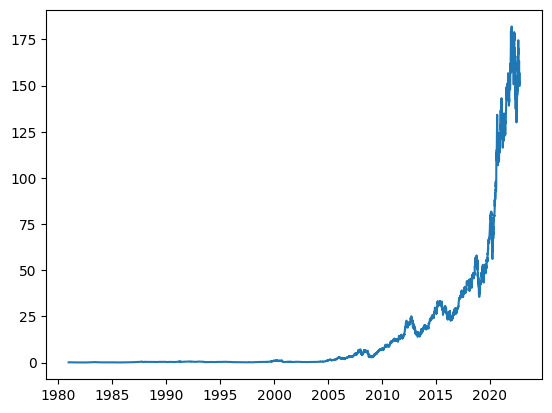

In [38]:
import matplotlib.pyplot as plt
plt.plot(df.index,df['Close'])

In [39]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2022-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,123.389999,122.540001,120.089996,120.589996
1,2021-03-26,122.540001,120.089996,120.589996,121.209999
2,2021-03-29,120.089996,120.589996,121.209999,121.389999
3,2021-03-30,120.589996,121.209999,121.389999,119.900002
4,2021-03-31,121.209999,121.389999,119.900002,122.150002
...,...,...,...,...,...
247,2022-03-17,150.619995,155.089996,159.589996,160.619995
248,2022-03-18,155.089996,159.589996,160.619995,163.979996
249,2022-03-21,159.589996,160.619995,163.979996,165.380005
250,2022-03-22,160.619995,163.979996,165.380005,168.820007


In [40]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

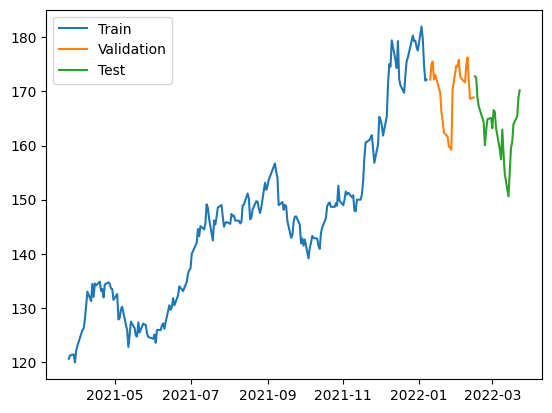

In [41]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 1s 40ms/step - loss: 21167.3027 - mean_absolute_error: 144.6990 - val_loss: 28580.3945 - val_mean_absolute_error: 168.9700
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 21024.1816 - mean_absolute_error: 144.2029 - val_loss: 28411.5977 - val_mean_absolute_error: 168.4697
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 20863.3730 - mean_absolute_error: 143.6433 - val_loss: 28195.7246 - val_mean_absolute_error: 167.8277
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 20642.6016 - mean_absolute_error: 142.8714 - val_loss: 27873.1426 - val_mean_absolute_error: 166.8638
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 20328.2871 - mean_absolute_error: 141.7630 - val_loss: 27429.0703 - val_mean_absolute_error: 165.5276
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 19867.4160 - mean_absolute_error: 140.1257 - val_loss: 26752.16

7/7 [==============================] - 0s 4ms/step - loss: 25.8212 - mean_absolute_error: 3.2710 - val_loss: 78.4768 - val_mean_absolute_error: 7.9471
Epoch 50/100
7/7 [==============================] - 0s 4ms/step - loss: 20.6266 - mean_absolute_error: 2.9096 - val_loss: 66.2649 - val_mean_absolute_error: 7.2219
Epoch 51/100
7/7 [==============================] - 0s 4ms/step - loss: 19.0429 - mean_absolute_error: 3.0489 - val_loss: 39.2453 - val_mean_absolute_error: 5.2247
Epoch 52/100
7/7 [==============================] - 0s 4ms/step - loss: 14.8356 - mean_absolute_error: 2.5508 - val_loss: 33.8636 - val_mean_absolute_error: 4.7587
Epoch 53/100
7/7 [==============================] - 0s 4ms/step - loss: 12.2045 - mean_absolute_error: 2.3706 - val_loss: 37.0387 - val_mean_absolute_error: 4.9539
Epoch 54/100
7/7 [==============================] - 0s 4ms/step - loss: 12.9685 - mean_absolute_error: 2.5613 - val_loss: 31.6960 - val_mean_absolute_error: 4.4579
Epoch 55/100
7/7 [===========

7/7 [==============================] - 0s 4ms/step - loss: 5.4076 - mean_absolute_error: 1.8133 - val_loss: 11.2775 - val_mean_absolute_error: 2.6141
Epoch 100/100
7/7 [==============================] - 0s 4ms/step - loss: 4.8490 - mean_absolute_error: 1.7238 - val_loss: 12.1258 - val_mean_absolute_error: 2.8770


7/7 [==============================] - 0s 1ms/step


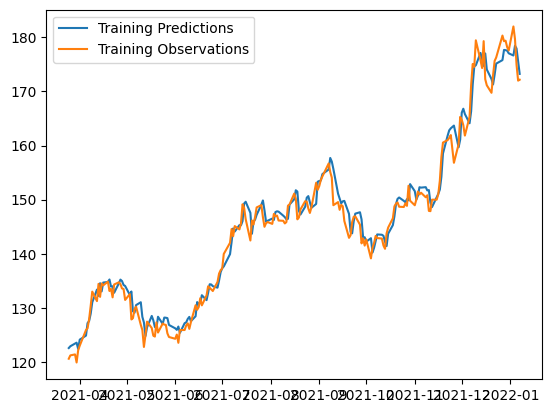

In [44]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 12ms/step


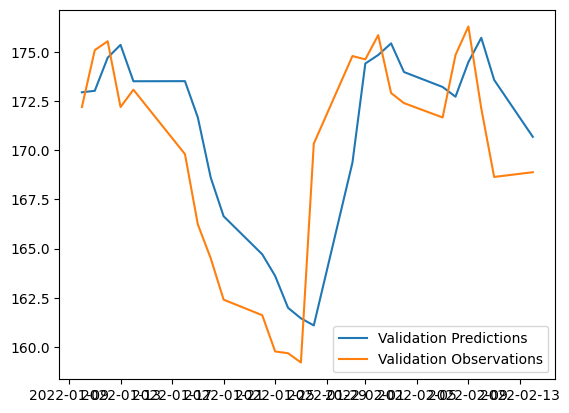

In [45]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 12ms/step


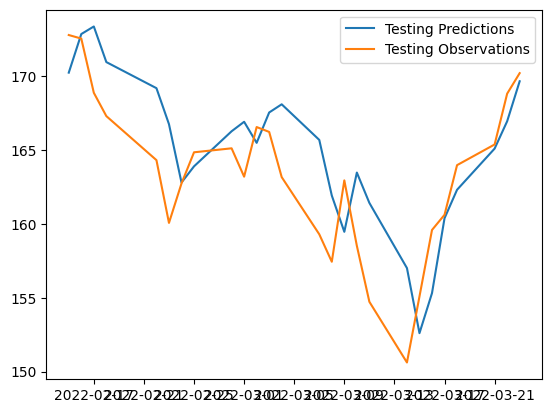

In [46]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

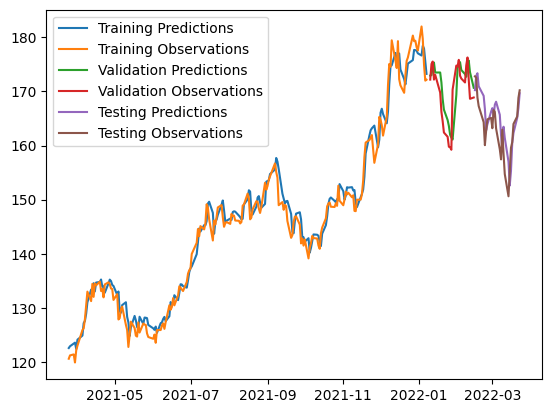

In [47]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [48]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 10ms/step


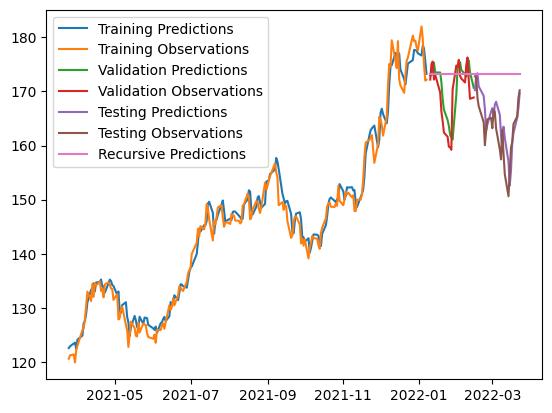

In [49]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])